<a href="https://colab.research.google.com/github/Pdugovich/DS-Unit-2-Applied-Modeling/blob/master/module4/assignment_applied_modeling_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


## Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Choose which observations you will use to train, validate, and test your model. And which observations, if any, to exclude.
- [ ] Determine whether your problem is regression or classification.
- [ ] Choose your evaluation metric.
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" information from the future?


In [0]:
# Import libraries
import pandas as pd
import os

In [0]:
df_original = pd.read_csv('oh_columbus_2019_08_13.csv')

In [23]:
df_original.head()

,raw_row_number,date,time,location,lat,lng,precinct,zone,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,outcome,search_conducted,reason_for_stop,raw_enforcement_taken
0,1|2|3,2012-01-01,01:16:00,livingston and carpenter,39.949920,-82.975067,11.0,5.0,white,female,vehicular,True,False,False,arrest,True,Moving Violation,Arrest|Vehicle Search|Driver Search
1,4,2012-01-01,01:20:00,E 16th Ave and Waldeck Ave,40.001043,-83.006871,4.0,4.0,white,male,vehicular,False,False,True,warning,False,Moving Violation,Verbal Warning
2,5,2012-01-01,07:54:00,king ave and cannon dr,39.990708,-83.020528,NaN,NaN,black,male,vehicular,False,False,True,warning,False,Moving Violation,Verbal Warning
3,6,2012-01-01,10:00:00,James rd and Livingston ave,39.946876,-82.915567,9.0,2.0,black,male,vehicular,False,False,True,warning,False,Moving Violation,Verbal Warning
4,7,2012-01-01,10:50:00,N Wilson Road and Twin Creeks,39.979569,-83.102749,15.0,3.0,black,female,vehicular,False,False,True,warning,False,Moving Violation,Verbal Warning


In [0]:
#Making a duplicate of the dataframe to retain the original
df = df_original.copy()

## Selecting a target

I'll be trying to predict whether an action is taken against the person being pulled over, this includes 'arrest' or 'citation'. The alternative is 'warning'

## Selecting how to train/test split

The dates range from the start of 2012 to the end of 2016. I'll try a couple different splits, but first, I'm going to train on 2012-2015, validate on 2015, then test on 2016. I might also try randomized or time-series crossvalidation.

In [25]:

df.dtypes

raw_row_number            object
date                      object
time                      object
location                  object
lat                      float64
lng                      float64
precinct                 float64
zone                     float64
subject_race              object
subject_sex               object
type                      object
arrest_made                 bool
citation_issued             bool
warning_issued              bool
outcome                   object
search_conducted            bool
reason_for_stop           object
raw_enforcement_taken     object
dtype: object

In [0]:
# Converting date and time to datetime format to split the data

In [0]:
df['date'] = pd.to_datetime(df['date'])

In [28]:
df['date']

0        2012-01-01
1        2012-01-01
2        2012-01-01
3        2012-01-01
4        2012-01-01
5        2012-01-01
6        2012-01-01
7        2012-01-01
8        2012-01-01
9        2012-01-01
10       2012-01-01
11       2012-01-01
12       2012-01-01
13       2012-01-01
14       2012-01-01
15       2012-01-01
16       2012-01-01
17       2012-01-01
18       2012-01-01
19       2012-01-01
20       2012-01-01
21       2012-01-01
22       2012-01-02
23       2012-01-02
24       2012-01-02
25       2012-01-02
26       2012-01-02
27       2012-01-02
28       2012-01-02
29       2012-01-02
            ...    
128127   2016-12-30
128128   2016-12-30
128129   2016-12-30
128130   2016-12-30
128131   2016-12-30
128132   2016-12-30
128133   2016-12-30
128134   2016-12-30
128135   2016-12-30
128136   2016-12-30
128137   2016-12-30
128138   2016-12-30
128139   2016-12-30
128140   2016-12-30
128141   2016-12-30
128142   2016-12-30
128143   2016-12-30
128144   2016-12-30
128145   2016-12-30


In [0]:
#Separating my data
my_train = df[df['date'] <= '2014-12-31']
my_val = df[(df['date'] >= '2015-01-01') & (df['date'] <= '2015-12-31')]
test = df[df['date'] >= '2016-01-01']

In [30]:
my_train.head()

,raw_row_number,date,time,location,lat,lng,precinct,zone,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,outcome,search_conducted,reason_for_stop,raw_enforcement_taken
0,1|2|3,2012-01-01,01:16:00,livingston and carpenter,39.949920,-82.975067,11.0,5.0,white,female,vehicular,True,False,False,arrest,True,Moving Violation,Arrest|Vehicle Search|Driver Search
1,4,2012-01-01,01:20:00,E 16th Ave and Waldeck Ave,40.001043,-83.006871,4.0,4.0,white,male,vehicular,False,False,True,warning,False,Moving Violation,Verbal Warning
2,5,2012-01-01,07:54:00,king ave and cannon dr,39.990708,-83.020528,NaN,NaN,black,male,vehicular,False,False,True,warning,False,Moving Violation,Verbal Warning
3,6,2012-01-01,10:00:00,James rd and Livingston ave,39.946876,-82.915567,9.0,2.0,black,male,vehicular,False,False,True,warning,False,Moving Violation,Verbal Warning
4,7,2012-01-01,10:50:00,N Wilson Road and Twin Creeks,39.979569,-83.102749,15.0,3.0,black,female,vehicular,False,False,True,warning,False,Moving Violation,Verbal Warning


In [31]:
my_train.shape,my_val.shape,test.shape

((79281, 18), (24126, 18), (24750, 18))

In [32]:
#Checking to make sure I grabbed all of the data
my_train.shape[0] + my_val.shape[0] + test.shape[0] == df.shape[0]

True

In [33]:
df.shape

(128157, 18)

## Regression or Classification?
This will be a binary classification

In [34]:
#Citation and arrest will be merged into a single value and be the 
my_train['outcome'].value_counts(normalize=True)

citation    0.555233
warning     0.405169
arrest      0.039598
Name: outcome, dtype: float64

## Evaluation Metric
I will be using roc/auc to evaluate. I might also use accuracy, since I believe I can improve greatly over baseline.

## Data Exploration / Cleaning

In [35]:
my_train.describe()

,lat,lng,precinct,zone
count,72577.000000,72577.000000,69423.000000,69423.000000
mean,39.991674,-82.985187,10.144131,3.223010
std,0.061422,0.076864,5.670301,1.472846
min,39.414070,-84.164396,1.000000,1.000000
25%,39.952456,-83.017007,5.000000,2.000000
50%,39.977232,-82.991951,10.000000,4.000000
75%,40.023498,-82.958907,16.000000,5.000000
max,40.602883,-80.715531,20.000000,5.000000


In [36]:
my_train.describe(exclude='number')

,raw_row_number,date,time,location,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,outcome,search_conducted,reason_for_stop,raw_enforcement_taken
count,79281,79281,79163,79281,79281,79281,79281,79281,79281,79281,79246,79281,79281,79281
unique,79281,1096,1437,35986,5,2,1,2,2,2,3,2,4,120
top,41519|41520,2012-02-03 00:00:00,16:00:00,70 and CHAMPION,white,male,vehicular,False,True,False,citation,False,Moving Violation,Traffic Citation
freq,1,162,247,645,40114,51984,79281,76143,46299,46480,44000,74350,59412,39778
first,NaN,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2014-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
my_train.isnull().sum()

raw_row_number              0
date                        0
time                      118
location                    0
lat                      6704
lng                      6704
precinct                 9858
zone                     9858
subject_race                0
subject_sex                 0
type                        0
arrest_made                 0
citation_issued             0
warning_issued              0
outcome                    35
search_conducted            0
reason_for_stop             0
raw_enforcement_taken       0
dtype: int64

This is interesting. All of the entries where an outcome is missing, there were vehicle searches.
Still, there are only 35 instances. It's probably safe to drop all of the nan outcomes without losing any value

In [38]:
my_train[my_train['outcome'].isnull() == True]

,raw_row_number,date,time,location,lat,lng,precinct,zone,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,outcome,search_conducted,reason_for_stop,raw_enforcement_taken
7196,8480,2012-03-09,20:10:00,BAIRSFORD DR and SARANAC DR,39.941613,-82.844087,14.0,2.0,black,female,vehicular,False,False,False,NaN,True,Investigatory,Vehicle Search
7443,8764|8765,2012-03-12,01:11:00,Easton Way and 270 s/b ramp,NaN,NaN,NaN,NaN,black,male,vehicular,False,False,False,NaN,True,Investigatory,Vehicle Search|Driver Search
8805,10360,2012-03-26,08:20:00,Fairwood and Forest,39.946118,-82.953945,11.0,5.0,black,male,vehicular,False,False,False,NaN,True,Moving Violation,Driver Search
9040,10627,2012-03-28,21:16:00,Interstate 70 and US Route 23,39.952785,-82.998751,11.0,5.0,white,male,vehicular,False,False,False,NaN,True,Investigatory,Vehicle Search
14086,16387,2012-05-22,18:55:00,Karl Rd and Satinwood Dr,40.084019,-82.974706,18.0,1.0,white,male,vehicular,False,False,False,NaN,True,Investigatory,Vehicle Search
15621,18124|18125,2012-06-10,21:45:00,Davis and Suulivant,39.953454,-83.020394,8.0,3.0,black,male,vehicular,False,False,False,NaN,True,Investigatory,Vehicle Search|Driver Search
18207,21152,2012-07-17,16:26:00,71 sb and 270 (north),39.980192,-82.856673,14.0,2.0,hispanic,male,vehicular,False,False,False,NaN,True,Moving Violation,Vehicle Search
20975,24439,2012-08-25,05:06:00,E. 161 and Tamarack Blvd,40.086852,-82.969602,18.0,1.0,white,male,vehicular,False,False,False,NaN,True,Investigatory,Vehicle Search
25923,30140,2012-11-08,05:10:00,Sullivant Ave and S Guilford Ave,39.950223,-83.037690,8.0,3.0,black,male,vehicular,False,False,False,NaN,True,Investigatory,Vehicle Search
26823,31185,2012-11-21,01:20:00,central and sullivant,39.950250,-83.036263,8.0,3.0,white,male,vehicular,False,False,False,NaN,True,Investigatory,Vehicle Search


In [39]:
df['location'].value_counts()

hamilton and 70                        758
i670wb and i71                         663
70 and CHAMPION                        647
70 and OHIO                            605
broad and mcnaughten                   569
BROAD and HIGH                         518
270 and morse                          493
GREENLAWN and 71                       460
w/b 70 and 71                          421
670 and 71                             415
270 and easton                         398
270 and smoky row                      387
70 e/b and miller/kelton               343
70 and hamilton                        336
E BROAD ST and I-71                    317
270 and 70                             317
LIVINGSTON and 5                       303
71 and 161                             301
70 and MILLER                          271
Agler and Sunbury                      267
i670eb and i71                         254
agler road and sunbury road            251
i70wb and miller ave                   230
70 WB and E

In [40]:
my_train['precinct'].value_counts(dropna=False
)

NaN     9858
16.0    7196
4.0     6655
3.0     5227
7.0     4270
12.0    4184
18.0    3924
9.0     3924
6.0     3693
17.0    3299
8.0     3228
14.0    3145
10.0    3110
11.0    2582
5.0     2511
1.0     2484
19.0    2431
2.0     2276
20.0    2240
13.0    1542
15.0    1502
Name: precinct, dtype: int64

- 'raw_row_number' just seems to count each individual action against a person. Three actions were taken against the first person, so that is raw_row_number 1,2, and 3.  That probably isn't useful, so I'll remove it


- 'location' is interesting in that is an intersection. I need to explore it more to see if it 'x and y' and also 'y and x' exist. I could strip out the ' and ' and separate the two crossroads into different columns.


- 'type' is a single value, so I can drop it


- 'arrest_made',  'citation_issued', and 'warning_issued' can be dropped because 'warning_issued' will be used as my binary classifier. I will need to invert the t/f and astype it to an integer.


- I need to do more exploration on 'search_conducted'. I'll likely drop that as data leakage since I feel like it would be highly correlated with action taken... After further exploration, the data is too dirty to deal with. There are multiple spellings, spelling errors, formatting differences. Also, this is covered in long/lat coordinates.


- 'raw_enforcement_taken' will be dropped as it includes my target

## Data Wrangling

In [0]:
def wrangle(X):
    
    #To prevent a warning.
    X = X.copy()
    
    # Pulling hour and minute from time column
    X['hour'] = pd.to_datetime(X['time']).dt.hour
    X['minute'] = pd.to_datetime(X['time']).dt.minute
    #X = X.drop(columns='time')
    
    #Pulling month and day and day of week from date
    X['month'] = X['date'].dt.month
    X['day'] = X['date'].dt.day
    X['day_of_week'] = X['date'].dt.weekday_name
    
    
    #Dropping unecessary columns
    #NOTE: location is too dirty now, but I'll attempt to clean it later
    X = X.drop(columns=['raw_row_number','type','location'])
    
    #Dropping data leakage/time-traveling data
    X = X.drop(columns=['arrest_made','citation_issued','warning_issued',
                        'search_conducted','raw_enforcement_taken'] )
    
    
    #Creating separate columns if a row has these values missing.
    col_has_missing = ['time','lat','lng','precinct','zone']
    for column in col_has_missing:
        X[column+'_MISSING'] = X[column].isnull()
        
    # converting outcome column to 1/0
    # 1 if a citation or arrest occured
    
    X['outcome'] = (X['outcome'] != 'warning').astype(int)
    
    return X
    
    

In [0]:
my_train = wrangle(my_train)
my_val = wrangle(my_val)
test = wrangle(test)

In [43]:
my_train.head()

,date,time,lat,lng,precinct,zone,subject_race,subject_sex,outcome,reason_for_stop,hour,minute,month,day,day_of_week,time_MISSING,lat_MISSING,lng_MISSING,precinct_MISSING,zone_MISSING
0,2012-01-01,01:16:00,39.949920,-82.975067,11.0,5.0,white,female,1,Moving Violation,1.0,16.0,1,1,Sunday,False,False,False,False,False
1,2012-01-01,01:20:00,40.001043,-83.006871,4.0,4.0,white,male,0,Moving Violation,1.0,20.0,1,1,Sunday,False,False,False,False,False
2,2012-01-01,07:54:00,39.990708,-83.020528,NaN,NaN,black,male,0,Moving Violation,7.0,54.0,1,1,Sunday,False,False,False,True,True
3,2012-01-01,10:00:00,39.946876,-82.915567,9.0,2.0,black,male,0,Moving Violation,10.0,0.0,1,1,Sunday,False,False,False,False,False
4,2012-01-01,10:50:00,39.979569,-83.102749,15.0,3.0,black,female,0,Moving Violation,10.0,50.0,1,1,Sunday,False,False,False,False,False


# Assignment 2

Lambda School Data Science

*Unit 2, Sprint 3, Module 2*

---


## Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - _**[A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)**_
  - [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)
  - _**[Boosting](https://www.youtube.com/watch?v=GM3CDQfQ4sw) (2.5 minute video)**_

## Some Exploratory Visualizations

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

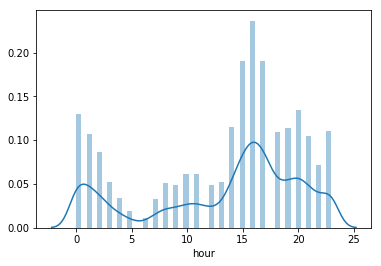

In [45]:
sns.distplot(my_train['hour'].dropna())

In [46]:
my_train['hour'].value_counts()

16.0    8604
15.0    6948
17.0    6948
20.0    4909
0.0     4732
14.0    4178
19.0    4167
23.0    4022
18.0    3996
1.0     3906
21.0    3794
2.0     3165
22.0    2600
10.0    2254
11.0    2247
3.0     1905
13.0    1886
8.0     1851
12.0    1774
9.0     1760
4.0     1233
7.0     1211
5.0      685
6.0      388
Name: hour, dtype: int64

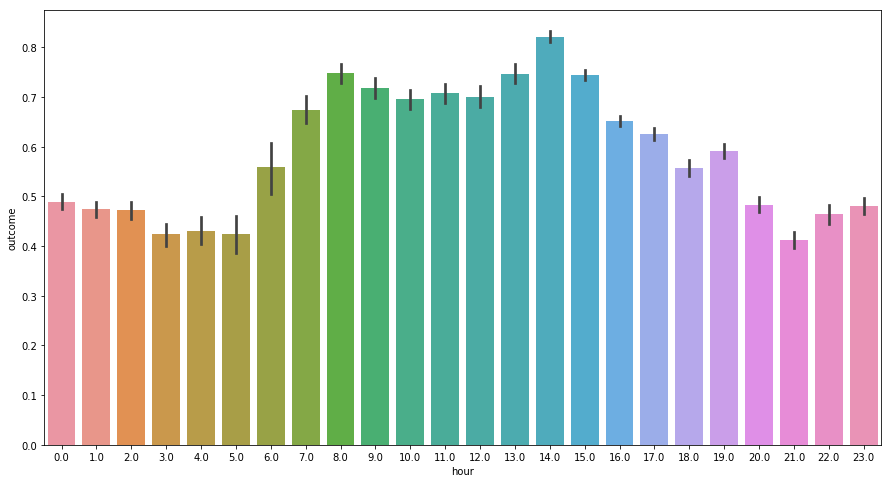

In [47]:
plt.figure(figsize=(15,8))

ax = sns.barplot(my_train['hour'].dropna(), my_train['outcome'])

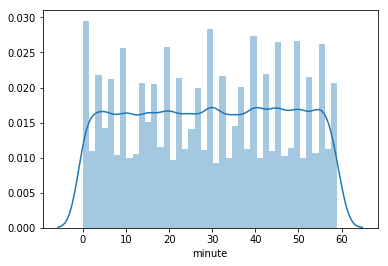

In [48]:
#Clearly no relationship here. I should probably drop the minute feature
sns.distplot(my_train['minute'].dropna())

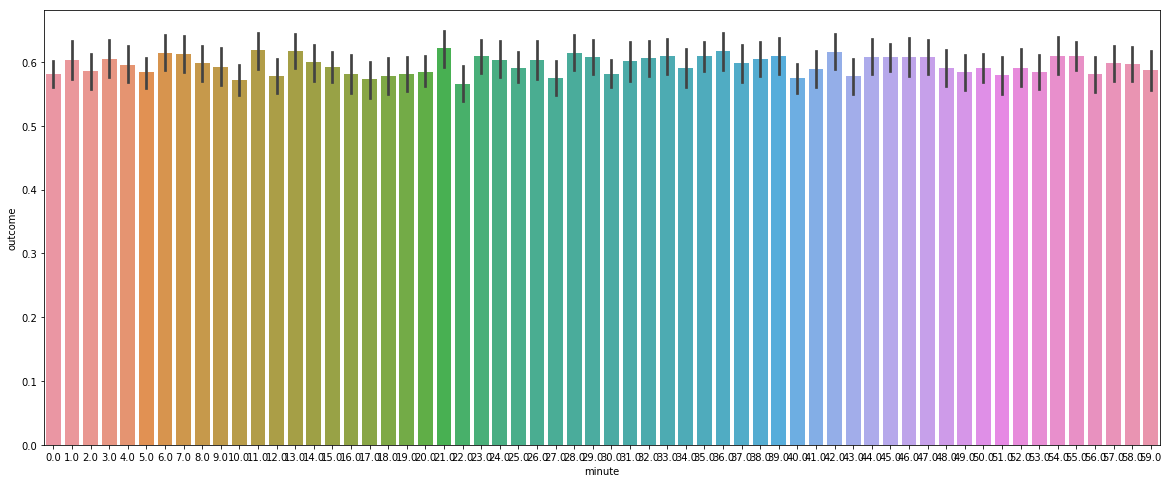

In [49]:
plt.figure(figsize=(20,8))
ax = sns.barplot(my_train['minute'].dropna(), my_train['outcome'])

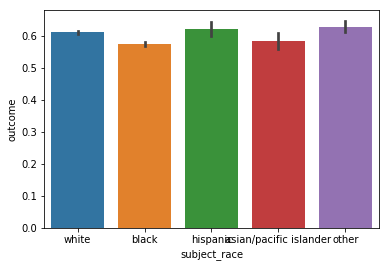

In [50]:
sns.barplot(my_train['subject_race'], my_train['outcome'])

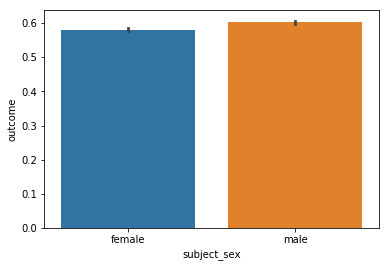

In [51]:
sns.barplot(my_train['subject_sex'], my_train['outcome'])

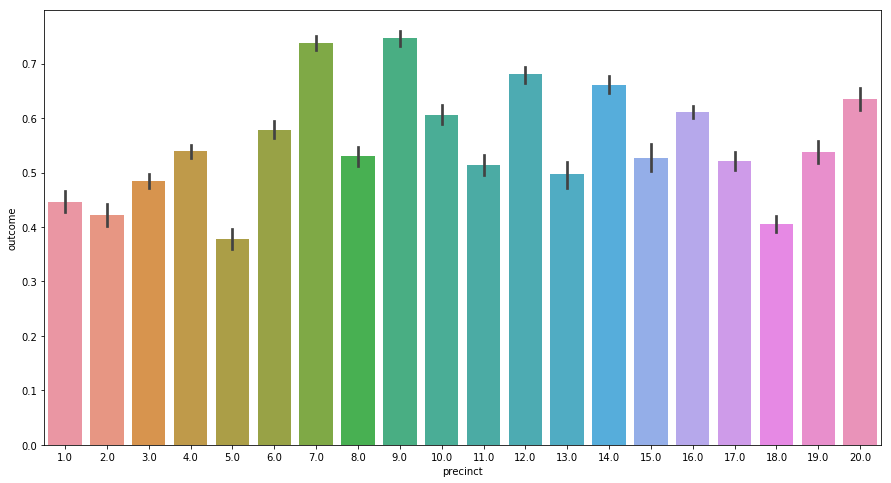

In [52]:
plt.figure(figsize=(15,8))

ax = sns.barplot(my_train['precinct'].dropna(), my_train['outcome'])

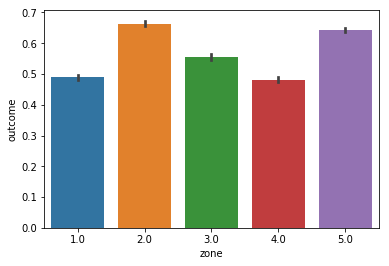

In [53]:
sns.barplot(my_train['zone'].dropna(), my_train['outcome'])

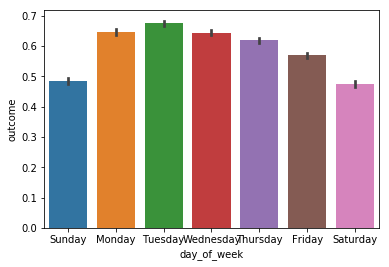

In [54]:
sns.barplot(my_train['day_of_week'].dropna(), my_train['outcome'])

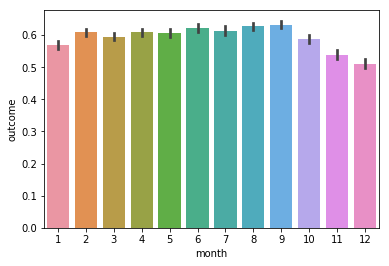

In [55]:
sns.barplot(my_train['month'].dropna(), my_train['outcome'])

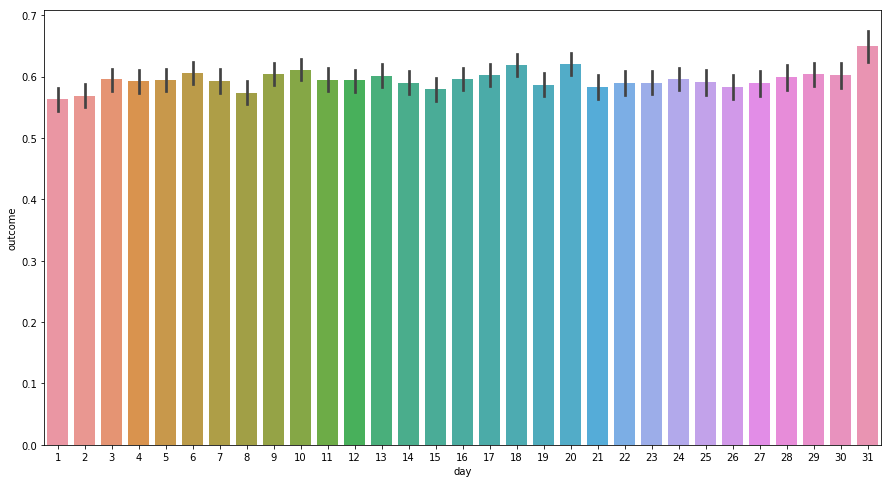

In [56]:
plt.figure(figsize=(15,8))

ax = sns.barplot(my_train['day'].dropna(), my_train['outcome'])

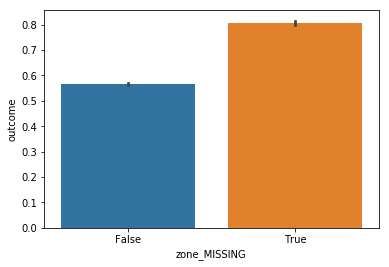

In [57]:
sns.barplot(my_train['zone_MISSING'].dropna(), my_train['outcome'])

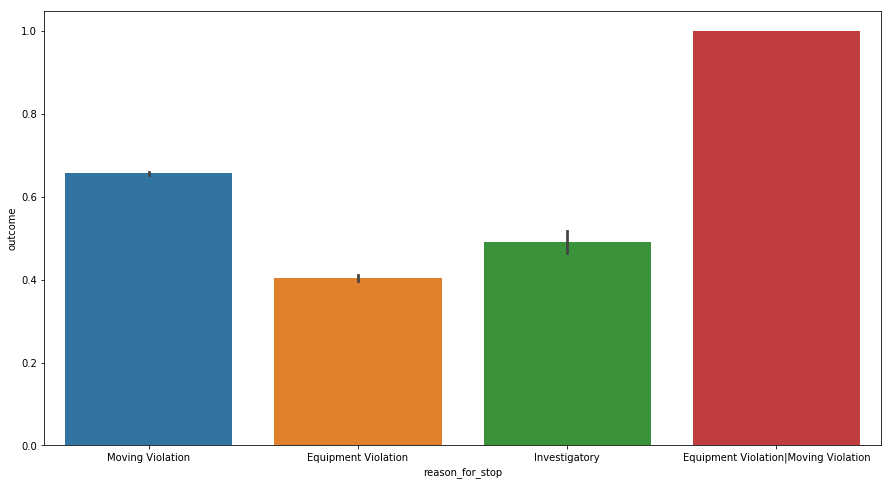

In [58]:
plt.figure(figsize=(15,8))

ax = sns.barplot(my_train['reason_for_stop'].dropna(), my_train['outcome'])

## Getting a baseline

In [0]:
target = 'outcome'
features = my_train.drop(columns=['outcome','date']).columns


X_train = my_train[features]
y_train = my_train[target]

X_val = my_val[features]
y_val = my_val[target]

X_test = test[features]
y_test = test[target]

In [60]:
# An arrest or citation occurs in the majority of cases
my_train['outcome'].value_counts()

1    47173
0    32108
Name: outcome, dtype: int64

In [0]:
y_pred = [1]* len(X_val)

In [0]:
from sklearn.metrics import accuracy_score

### My accuracy score to beat is 57.40%

In [63]:
accuracy_score(y_pred, y_val)

0.5740280195639559

## Initial fitting the model

In [65]:
!pip install category_encoders

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

     |████████████████████████████████| 102kB 3.3MB/s 


In [66]:
my_pipeline_rforest = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=100, random_state=333, n_jobs=-1)
)

my_pipeline_rforest.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['time', 'subject_race', 'subject_sex',
                                      'reason_for_stop', 'day_of_week'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'time',
                                          'data_type': dtype('O'),
                                          'mapping': 01:16:00       1
01:20:00       2
07:54:00       3
10:00:00       4
10:50:00       5
11:23:00       6
11:32:00       7
15:01:00       8
15:38:00       9
17:15:00      10...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                      

### Random Forest Classifier yields 63.99% accuracy

In [67]:
my_pipeline_rforest.score(X_val,y_val)

0.6399320235430656

In [68]:

my_pipeline_xgboost = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_estimators=100, random_state=333, n_jobs=-1)
)

my_pipeline_xgboost.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['time', 'subject_race', 'subject_sex',
                                      'reason_for_stop', 'day_of_week'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'time',
                                          'data_type': dtype('O'),
                                          'mapping': 01:16:00       1
01:20:00       2
07:54:00       3
10:00:00       4
10:50:00       5
11:23:00       6
11:32:00       7
15:01:00       8
15:38:00       9
17:15:00      10...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               

### XGBoost yields 64.17% accuracy

In [69]:
my_pipeline_xgboost.score(X_val,y_val)

0.6416728840255326

In [0]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

In [0]:
eval_set = [(X_train_encoded, y_train),
            (X_val_encoded, y_val)]

In [0]:
model = XGBClassifier(
    n_estimators = 1000, # up to this number
    max_depth=6, #Tried multiple depths, 6 was the best
    learning_rate=0.1,
    n_jobs=-1
)

In [73]:
model.fit(X_train_encoded,
          y_train, eval_set=eval_set,
          eval_metric='error',
          early_stopping_rounds=50)

[0]	validation_0-error:0.331366	validation_1-error:0.359736
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.329902	validation_1-error:0.356752
[2]	validation_0-error:0.329524	validation_1-error:0.358907
[3]	validation_0-error:0.331012	validation_1-error:0.362513
[4]	validation_0-error:0.330344	validation_1-error:0.361436
[5]	validation_0-error:0.330621	validation_1-error:0.361685
[6]	validation_0-error:0.327872	validation_1-error:0.358327
[7]	validation_0-error:0.324933	validation_1-error:0.358451
[8]	validation_0-error:0.32569	validation_1-error:0.360358
[9]	validation_0-error:0.32381	validation_1-error:0.358369
[10]	validation_0-error:0.323646	validation_1-error:0.358742
[11]	validation_0-error:0.322852	validation_1-error:0.357871
[12]	validation_0-error:0.322625	validation_1-error:0.357457
[13]	validation_0-error:0.321565	validation_1-error:0.3569

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### Using early stopping, this XGBoost yields 65.80% accuracy, the highest so far. n_estimators = 174

In [74]:
model.score(X_val_encoded,y_val)

0.6580452623725441

### Visualizing error

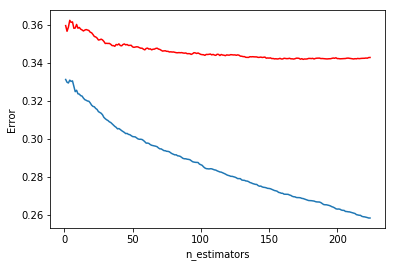

In [75]:
results = model.evals_result()
#This is just a python dictionary thing now
train_error = results['validation_0']['error']
val_error = results['validation_1']['error']
len(train_error)

epoch = range(1, len(train_error)+1)

plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation',color='red')
plt.ylabel('Error')
plt.xlabel('n_estimators');

## Finding permutation importances

In [76]:
#Eli5 doesn't work with pipelines, so we need to sepeare the steps


#Setting transformers to encode then impute the data
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

#Transforming the data
X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

#Setting the model with hyperparameters set to optimal found above
model = XGBClassifier(
    n_estimators = 174, 
    max_depth=6, 
    learning_rate=0.1,
    n_jobs=-1
)
#Fitting the data to the model
model.fit(X_train_transformed, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=174, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [78]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model, 
    scoring='accuracy', 
    n_iter=10, 
    random_state=333
)

permuter.fit(X_val_transformed, y_val)

     |████████████████████████████████| 112kB 4.8MB/s 


Using TensorFlow backend.


PermutationImportance(cv='prefit',
                      estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              learning_rate=0.1,
                                              max_delta_step=0, max_depth=6,
                                              min_child_weight=1, missing=None,
                                              n_estimators=174, n_jobs=-1,
                                              nthread=None,
                                              objective='binary:logistic',
                                              random_state=0, reg_alpha=0,
                                              reg_lambda=1, scale_pos_weight=1,
                                              seed=None, silent=None,
                    

In [79]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

hour                0.046095
lat                 0.026938
reason_for_stop     0.024476
lng                 0.021645
precinct            0.006420
day_of_week         0.005832
month               0.003631
subject_sex         0.003192
subject_race        0.002910
lat_MISSING         0.002454
day                 0.001878
time                0.001471
precinct_MISSING    0.001198
minute              0.000572
time_MISSING        0.000008
lng_MISSING         0.000000
zone_MISSING        0.000000
zone               -0.000568
dtype: float64

### So the most important factor in determining if you will be given a citation or arrested vs let off with a warning is the hour of the day, followed by the latitude, THEN the reason for the stop.

looking at this, it becomes apparent I need more features

In [80]:
eli5.show_weights(
    permuter, 
    top=None, # to show all features
    feature_names=feature_names
)

Weight,Feature
0.0461 ± 0.0034,hour
0.0269 ± 0.0028,lat
0.0245 ± 0.0026,reason_for_stop
0.0216 ± 0.0039,lng
0.0064 ± 0.0018,precinct
0.0058 ± 0.0021,day_of_week
0.0036 ± 0.0023,month
0.0032 ± 0.0015,subject_sex
0.0029 ± 0.0016,subject_race
0.0025 ± 0.0013,lat_MISSING


# Assignment 3

Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Applied Modeling, Module 3

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploration, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Share at least 1 visualization on Slack.

(If you have not yet completed an initial model yet for your portfolio project, then do today's assignment using your Tanzania Waterpumps model.)

## Stretch Goals
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

## Links
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

### Making partial dependence plot

In [0]:
target = 'outcome'
features = my_val.drop(columns=['outcome','date']).columns


X_train = my_train[features]
y_train = my_train[target]

X_val = my_val[features]
y_val = my_val[target]

X_test = test[features]
y_test = test[target]

In [0]:
encoder = ce.OrdinalEncoder()
X_val_encoded = encoder.fit_transform(X_val)

In [0]:
model = XGBClassifier(
    n_estimators = 174, 
    max_depth=6, 
    learning_rate=0.1,
    n_jobs=-1
)

In [84]:
model.fit(X_val_encoded, y_val)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=174, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

     |████████████████████████████████| 57.7MB 57.2MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690723 sha256=a7c759d89d329c56643f0cbad089fb22a8ccccaa849f82ec47bb621f17836d90
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff5f58875f8>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff5f7122da0>})

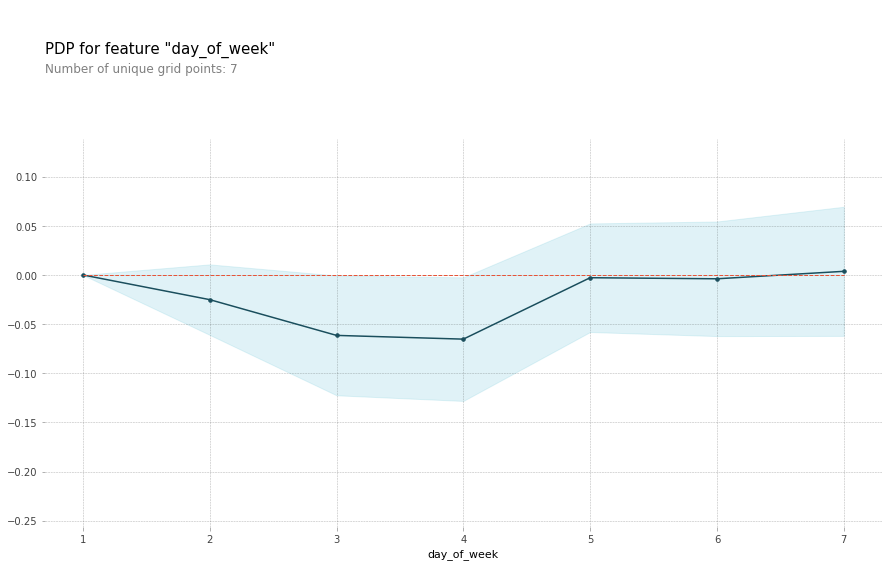

In [86]:
!pip install pdpbox

from pdpbox.pdp import pdp_interact, pdp_interact_plot, pdp_isolate
from pdpbox import pdp

feature = 'day_of_week'

pdp_dist = pdp.pdp_isolate(model=model,
                           dataset=X_val_encoded,
                           model_features = features,
                           feature=feature)
pdp.pdp_plot(pdp_dist,feature)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff5f5997748>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff5f7122f98>})

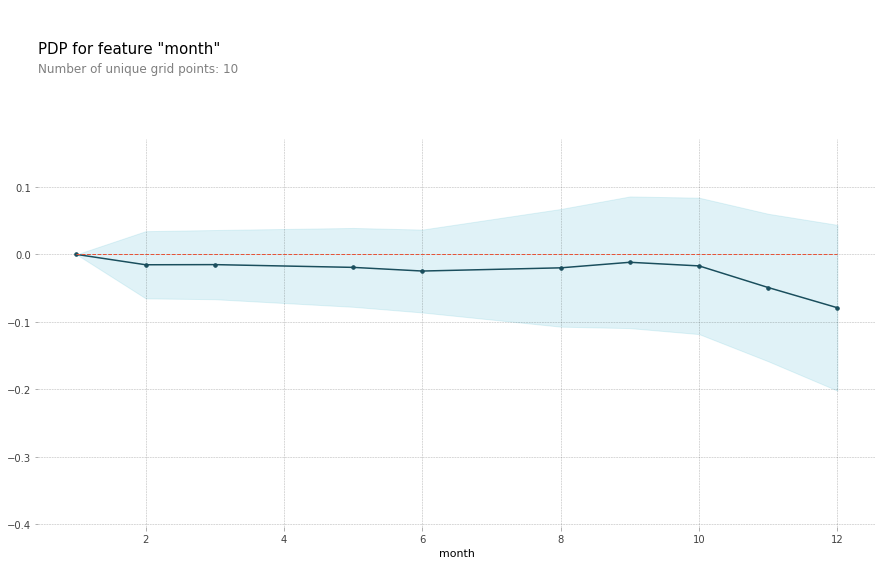

In [87]:
feature = 'month'

pdp_dist = pdp.pdp_isolate(model=model,
                           dataset=X_val_encoded,
                           model_features = features,
                           feature=feature)
pdp.pdp_plot(pdp_dist,feature)

### Multiple features


(<Figure size 540x684 with 3 Axes>,
 {'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff5f5917dd8>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff5f58314e0>})

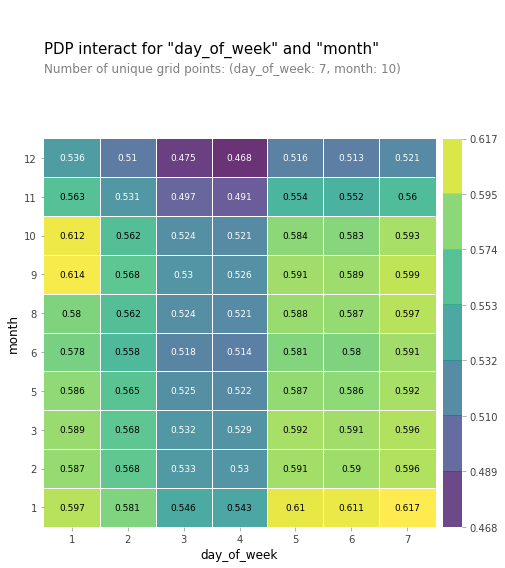

In [88]:
features = ['day_of_week', 'month']

interaction = pdp_interact(
    model=model, 
    dataset=X_val_encoded, 
    model_features=X_val_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features)


# Assignment 4

Lambda School Data Science

*Unit 2, Sprint 3, Module 4*

---


# Model Interpretation 2

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make a Shapley force plot to explain at least 1 individual prediction.
- [ ] Share at least 1 visualization (of any type) on Slack.

But, if you aren't ready to make a Shapley force plot with your own dataset today, that's okay. You can practice this objective with another dataset instead. You may choose any dataset you've worked with previously.

## Stretch Goals
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!


## Links
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

In [89]:
!pip install shap

     |████████████████████████████████| 245kB 4.7MB/s 
  Created wheel for shap: filename=shap-0.30.2-cp36-cp36m-linux_x86_64.whl size=360635 sha256=9f96748a6c760910be8f187920d307fd7432dad9bfc53d7b04c32266e8b85e8a
  Stored in directory: /root/.cache/pip/wheels/97/46/c9/b9dc708249af7eaf0951b2be62e0f6191f4de385a48e1a4cb7
Successfully built shap


In [0]:
processor = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer()
)


X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)


In [0]:
X_test_processed = processor.transform(X_test)

In [99]:
model = XGBClassifier(
    n_estimators = 174, 
    max_depth=6, 
    learning_rate=0.1,
    n_jobs=-1
)
model.fit(X_train_processed,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=174, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [103]:
import shap
row = X_test.iloc[[1057]]

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    link='logit',
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row
)